In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/automobile_performance.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_efficiency     398 non-null    float64
 1   engine_config       398 non-null    int64  
 2   engine_volume       398 non-null    float64
 3   power_output        398 non-null    object 
 4   vehicle_mass        398 non-null    int64  
 5   accel_capability    398 non-null    float64
 6   release_year        398 non-null    int64  
 7   manufacture_region  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [2]:
#From the .info we can see that there are no null values in the dataset
df[df.notna()]

,fuel_efficiency,engine_config,engine_volume,power_output,vehicle_mass,accel_capability,release_year,manufacture_region
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
df_unique=df
print(len(df))

df_unique=df_unique.drop_duplicates()
print(len(df_unique))


# We can understand that there are no duplicate values

398
398


In [4]:
#To Remove Outliers
cols=['fuel_efficiency','engine_volume','power_output','vehicle_mass','accel_capability']
df_unique[cols] = df_unique[cols].apply(pd.to_numeric, errors='coerce')
for i in cols:
  q1=df_unique[i].quantile(0.25)
  q3=df_unique[i].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+(1.5*iqr)
  lower_bound=q1-(1.5*iqr)
  df_unique=df_unique[(df_unique[i]>=lower_bound) & (df_unique[i]<=upper_bound)]

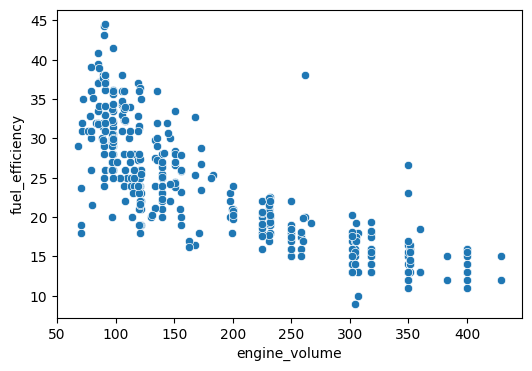

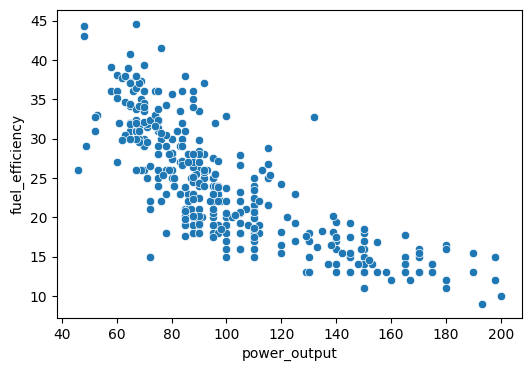

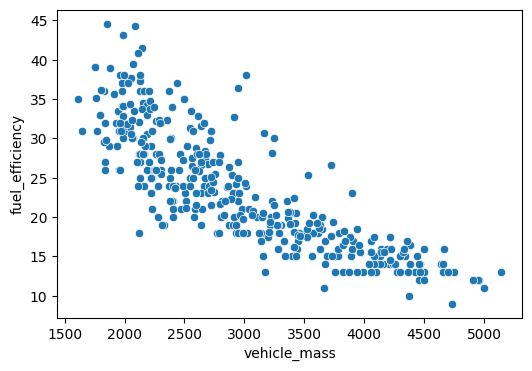

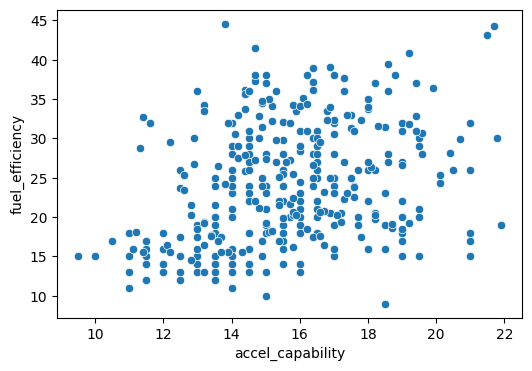

In [5]:
cat_cols=['engine_config','release_year','manufacture_region']
import matplotlib.pyplot as plt
import seaborn as sns
for col in cols[1:]:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=df_unique[col],y=df_unique['fuel_efficiency'])



The conclusions from the above plots:

**fuel_efficiency vs power_output:**

There is a clear downward slope and hence we can say that as power_output increases the fuel_efficiency decreases

**fuel_efficiency vs vehicle mass:**

It takes more energy (and therefore more fuel) to move a heavier object.

**fuel_efficiency vs accel_capability:**

No much correlation hence alomst independent.

**fuel_efficiency vs engine_volume**

Clear -ve correlation

bigger_engines are less fuel-efficient.





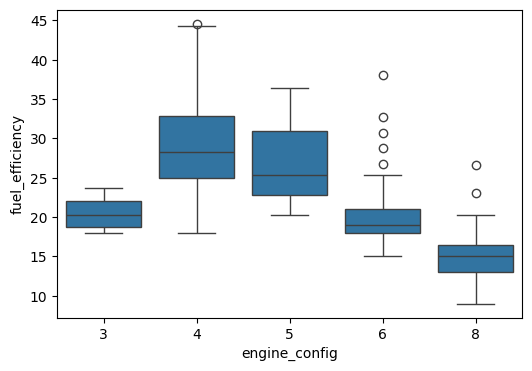

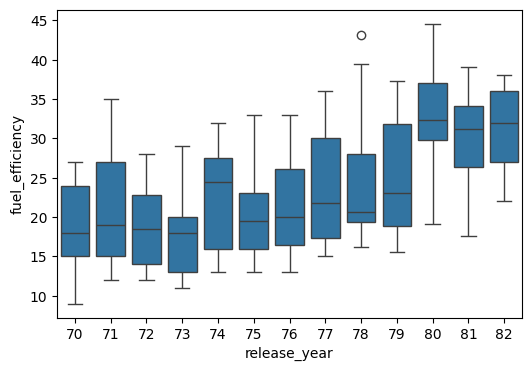

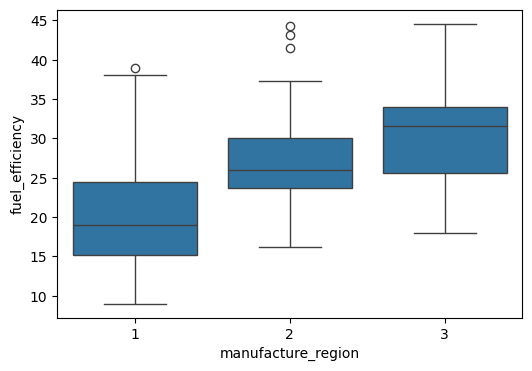

In [6]:
for col in cat_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df_unique[col],y=df_unique['fuel_efficiency'])

In [7]:
#Removing outliers in categorical columns

def remove_outliers_by_group(df, group_col, value_col):
    df_cleaned = pd.DataFrame()
    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]
        q1 = group_df[value_col].quantile(0.25)
        q3 = group_df[value_col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        group_cleaned = group_df[(group_df[value_col] >= lower_bound) & (group_df[value_col] <= upper_bound)]
        df_cleaned = pd.concat([df_cleaned, group_cleaned])
    return df_cleaned

cleaned_df = remove_outliers_by_group(df_unique, group_col='engine_config', value_col='fuel_efficiency')

df_after_region = remove_outliers_by_group(cleaned_df,
                                           group_col='manufacture_region',
                                           value_col='fuel_efficiency')
df_final_cleaned = remove_outliers_by_group(df_after_region,
                                            group_col='release_year',
                                            value_col='fuel_efficiency')

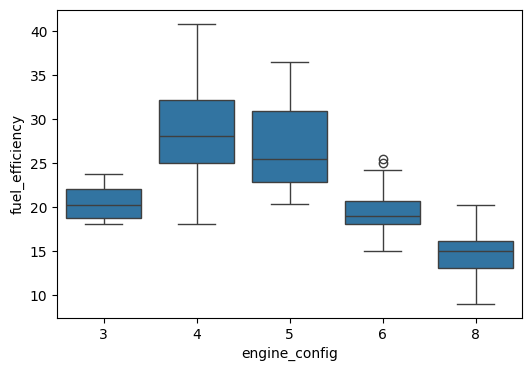

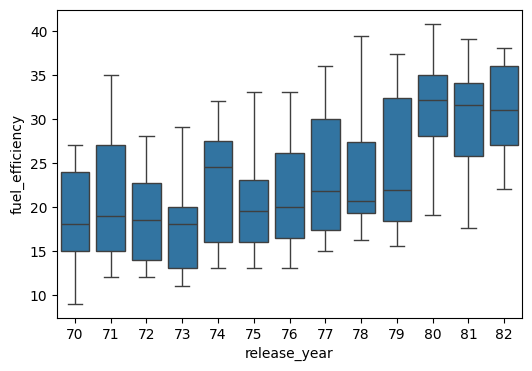

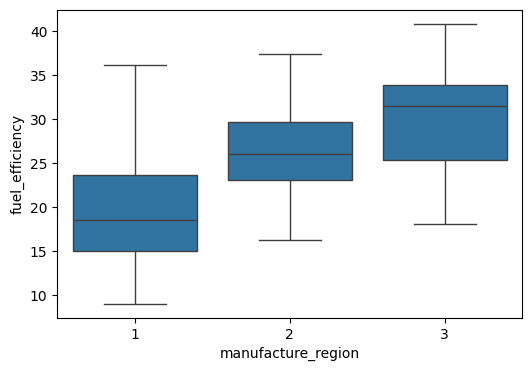

In [8]:
for col in cat_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df_final_cleaned[col],y=df_final_cleaned['fuel_efficiency'])

**For engine_config:**

It clearly shows that fewer the cylinders more the efficiency.

**For release_year:**

As years passed the fuel efficiency got better

**For manufacture_region:**

Japan produces the most fuel_efficient cars followed by Europe and USA


In [9]:
encodable = ['manufacture_region', 'engine_config']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_final_cleaned, columns=encodable)

In [10]:
df_encoded

,fuel_efficiency,engine_volume,power_output,vehicle_mass,accel_capability,release_year,manufacture_region_1,manufacture_region_2,manufacture_region_3,engine_config_3,engine_config_4,engine_config_5,engine_config_6,engine_config_8
0,18.0,307.0,130.0,3504,12.0,70,True,False,False,False,False,False,False,True
1,15.0,350.0,165.0,3693,11.5,70,True,False,False,False,False,False,False,True
2,18.0,318.0,150.0,3436,11.0,70,True,False,False,False,False,False,False,True
3,16.0,304.0,150.0,3433,12.0,70,True,False,False,False,False,False,False,True
4,17.0,302.0,140.0,3449,10.5,70,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,38.0,91.0,67.0,1965,15.0,82,False,False,True,False,True,False,False,False
384,32.0,91.0,67.0,1965,15.7,82,False,False,True,False,True,False,False,False
385,38.0,91.0,67.0,1995,16.2,82,False,False,True,False,True,False,False,False
390,32.0,144.0,96.0,2665,13.9,82,False,False,True,False,True,False,False,False


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

X=df_encoded.drop('fuel_efficiency',axis=1)
y=df_encoded['fuel_efficiency']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models={
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}

for z,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(f'Model: {z}')
  print(f'R2 Score: {r2_score(y_test,y_pred)}')
  print(f'RMSE: np.sqrt({mean_squared_error(y_test,y_pred)})')
  print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
  print()


Model: LinearRegression
R2 Score: 0.8882671435787348
RMSE: np.sqrt(6.5999182229270685)
MAE: 1.948476027442887

Model: RandomForestRegressor
R2 Score: 0.8991835843307541
RMSE: np.sqrt(5.9550979027777755)
MAE: 1.8720972222222219

Model: GradientBoostingRegressor
R2 Score: 0.8853354255664005
RMSE: np.sqrt(6.7730910903702615)
MAE: 1.928459276802615



Preprocessing steps
Row -> Check with existing output val and prediction

For a good model we need to have a ***high R2 score*** and **low MAE and RMSE scores**.

**Here the data trained on a RandomForestRegressor gives the required results.**